# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Name:</h2> <h2>Emoe-kabu Benedict<h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data.shape

(3333, 11)

In [4]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

In [6]:
new_desc = {'dtype' : data.dtypes,
            'null' : data.isnull().sum(),
            'null_%' : data.isnull().sum()/data.shape[0],
            'unique' : data.nunique(),
            'unique_%' : data.nunique()/data.shape[0]}

new_desc = pd.DataFrame(new_desc)

In [7]:
new_desc

,dtype,null,null_%,unique,unique_%
Churn,int64,0,0.0,2,0.000600
AccountWeeks,int64,0,0.0,212,0.063606
ContractRenewal,int64,0,0.0,2,0.000600
DataPlan,int64,0,0.0,2,0.000600
DataUsage,float64,0,0.0,174,0.052205
CustServCalls,int64,0,0.0,10,0.003000
DayMins,float64,0,0.0,1667,0.500150
DayCalls,int64,0,0.0,119,0.035704
MonthlyCharge,float64,0,0.0,627,0.188119
OverageFee,float64,0,0.0,1024,0.307231


<h4>From the above, it is observed that the data does not contain any NaN values.

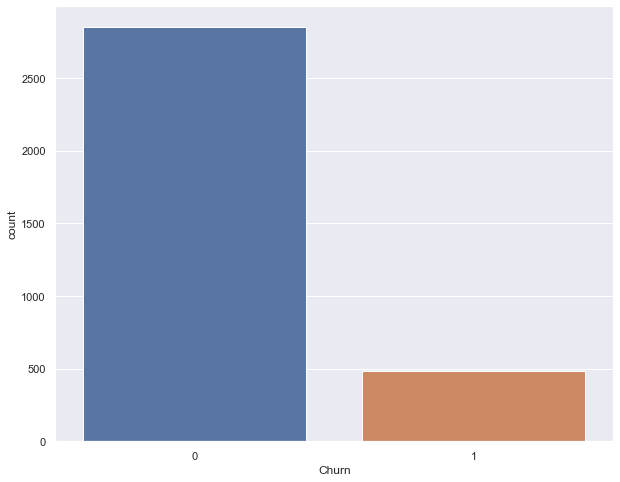

In [8]:
# Our label Distribution (countplot)
plt.figure(figsize = (10, 8))
plt.axes()
sns.countplot(x = 'Churn', data = data)
plt.show()

In [9]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

# Example EDA


In [10]:
def univariate_plot(data):
    for col in data.columns:
        plt.figure(figsize = (10, 8))
        sns.distplot(data[col], color = 'blue')
        plt.show()

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


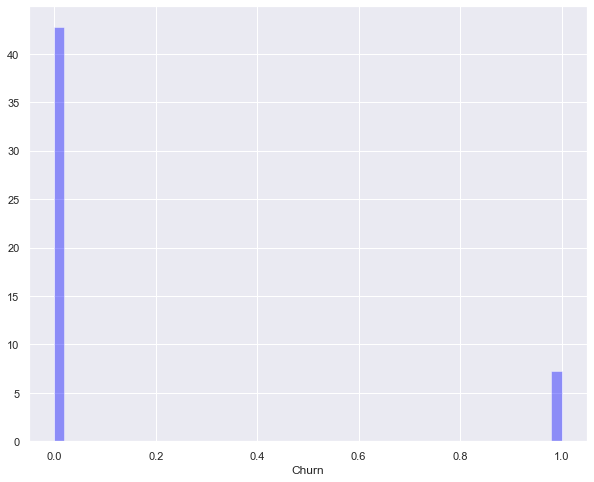

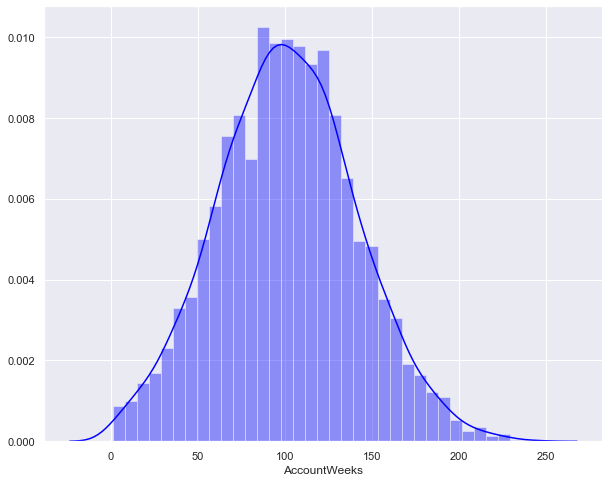

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


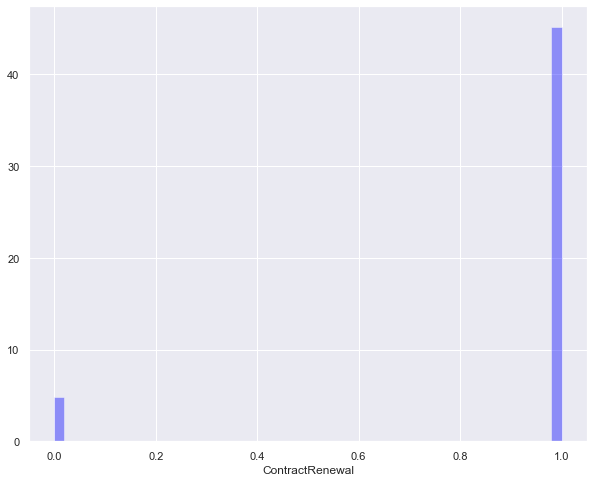

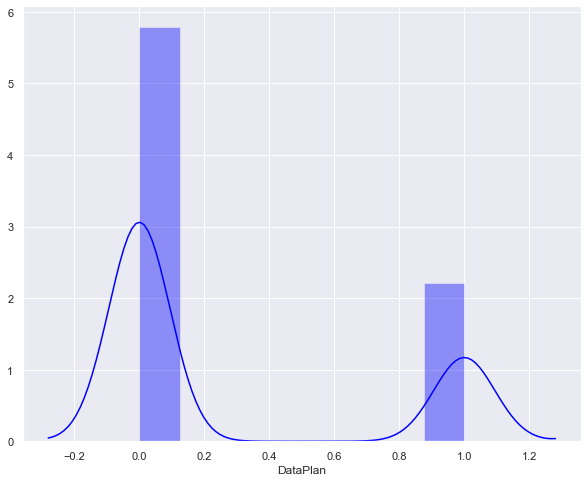

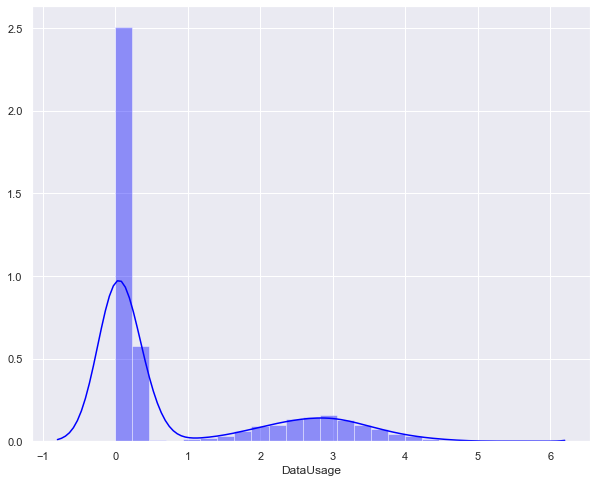

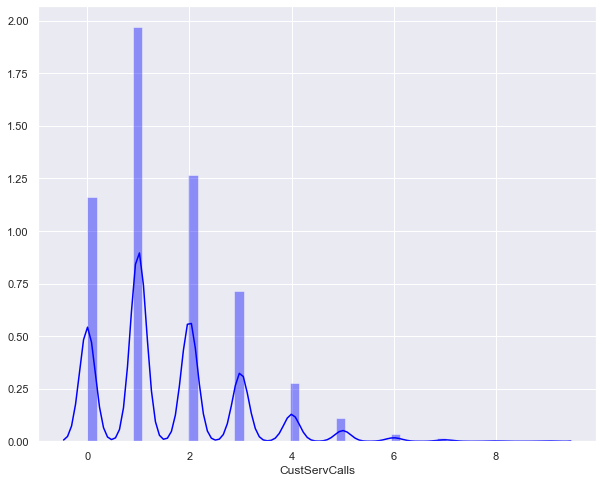

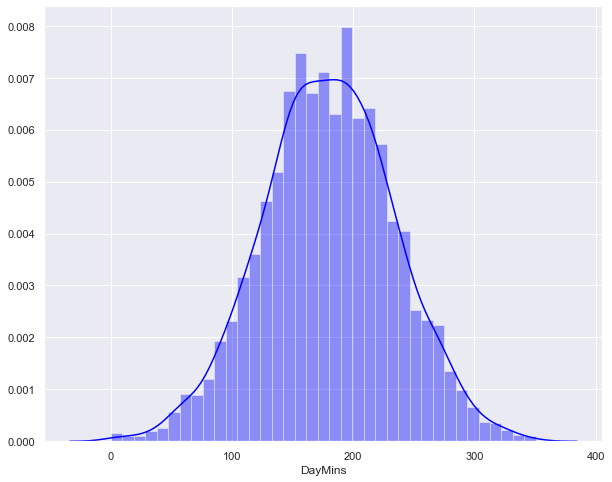

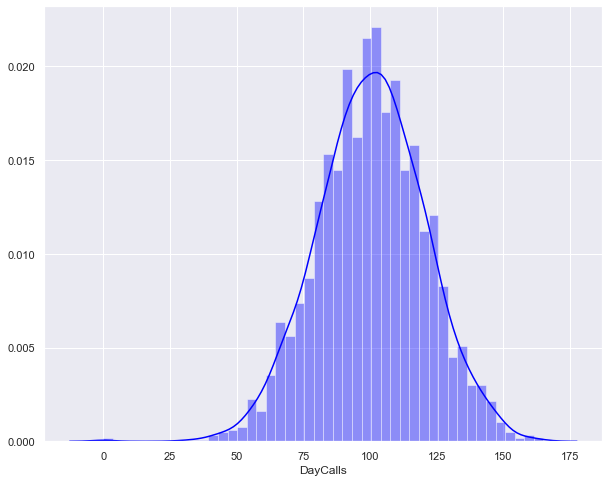

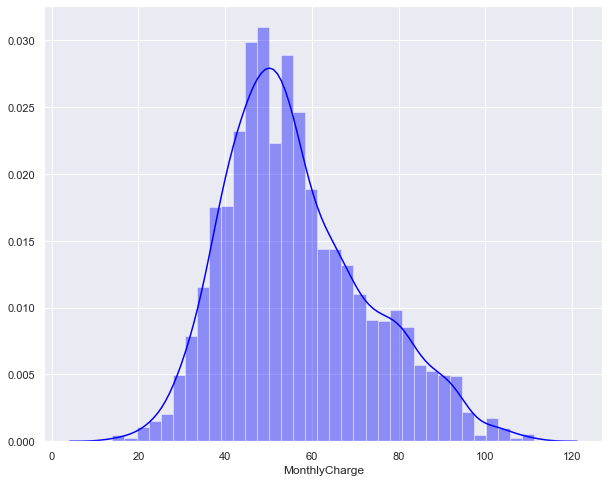

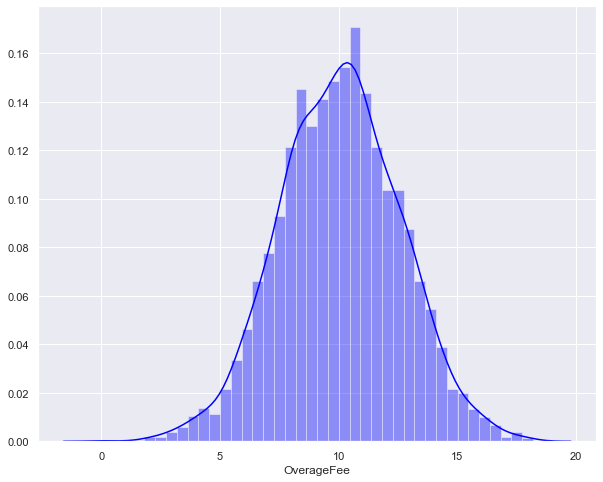

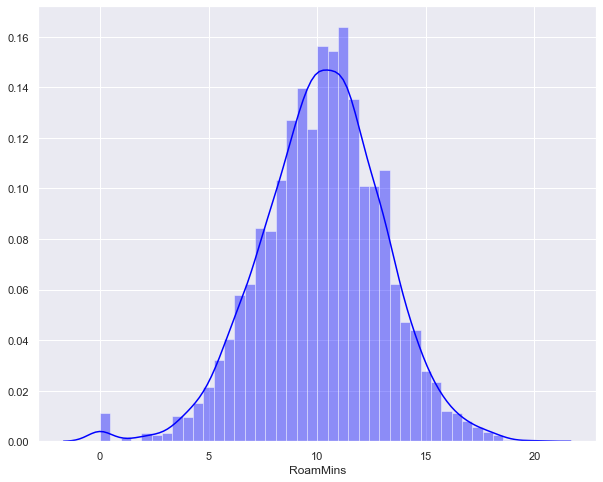

In [11]:
univariate_plot(data)

C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PROBOOK\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


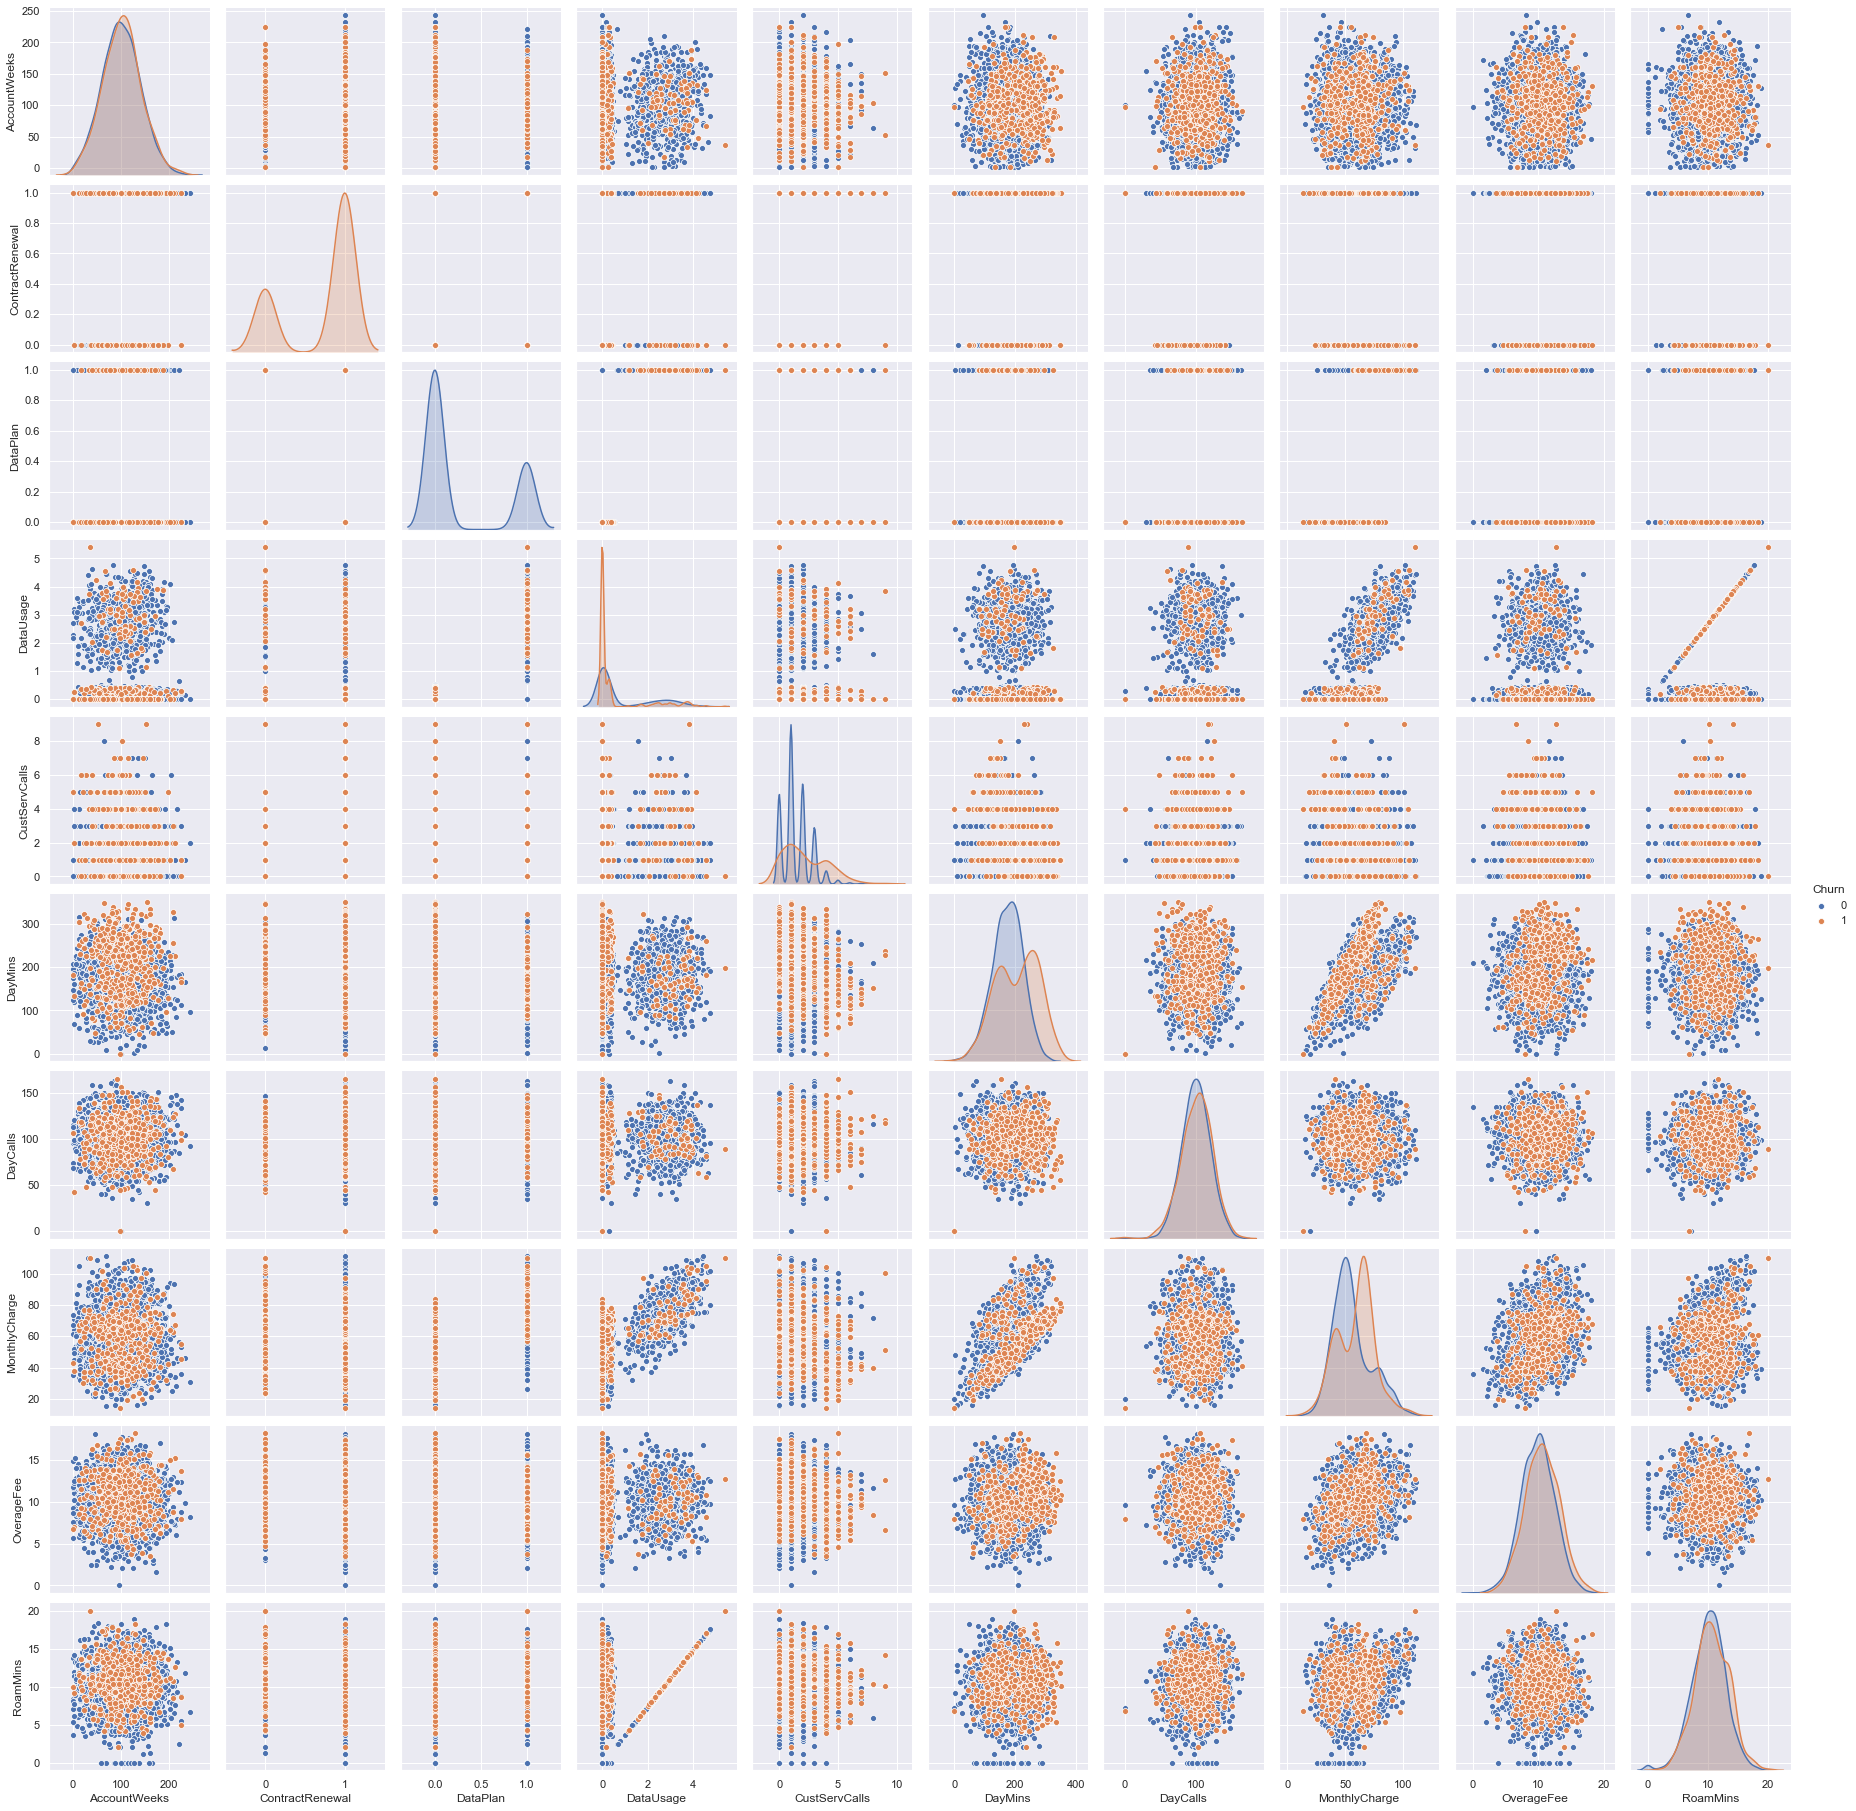

In [12]:
sns.pairplot(data = data, hue = 'Churn', kind = 'scatter', diag_kind = 'kde')

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [13]:
data.shape

(3333, 11)

In [14]:
data.duplicated().sum()

0

The above analysis proves the absense of duplicated data. In essense, all the observations contained in the data are unique points of data.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop('Churn', axis = 1)
y = data.iloc[:, 0]

In [17]:
from scipy import stats
z = np.abs(stats.zscore(X))
z

array([[0.67648946, 0.32758048, 1.6170861 , ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.14906505, 0.32758048, 1.6170861 , ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.9025285 , 0.32758048, 0.61839626, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [1.83505538, 0.32758048, 0.61839626, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [2.08295458, 3.05268496, 0.61839626, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.67974475, 0.32758048, 1.6170861 , ..., 2.66049626, 1.28129669,
        1.24048169]])

In [18]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [19]:
X = X.drop(outliers,axis = 0).reset_index(drop = False)
display(X)

y = y[list(X["index"])]
len(y)

,index,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,6,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


2919

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 123)

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [22]:
y_train.value_counts()

0    1818
1     225
Name: Churn, dtype: int64

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

<h4>The models chosen are: Logistivc Regression, Decision Trees, and AdaBoost. They will be tested for the effect of scaling, robust scaling to be precise.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, f1_score

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
rob_scaler = MinMaxScaler()
X_train_sc = rob_scaler.fit_transform(X_train)
X_test_sc = rob_scaler.transform(X_test)

In [27]:
models = {}

Ada_model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 7), random_state = 123)
DTC_model = DecisionTreeClassifier(max_depth = 6, criterion = 'entropy', random_state = 123)
log_reg_model = LogisticRegression(random_state = 123, max_iter = 500)

models['AdaBoost'] = Ada_model
models['Decision Tree'] = DTC_model
models['Logistic Regression'] = log_reg_model

In [28]:
def evaluate_model(models, X_train, y_train, X_test, y_test):
    models.fit(X_train, y_train)
    yhat = models.predict(X_test)
    
    acc_result = accuracy_score(y_test, yhat)
    f1_result = f1_score(y_test, yhat, average = 'macro')
    recall = recall_score(y_test, yhat, average = 'macro')
    precision = precision_score(y_test, yhat, average = 'macro')
    roc_auc = roc_auc_score(y_test, yhat, average = 'macro')
    
    from pprint import pprint
    performance = {'accuracy' : acc_result, 'f1' : f1_result, 'recall' : recall, 'precision' : precision, 'roc_auc' : roc_auc}
    print('                                        ')
    print('**********************************')
    print('**********************************')
    print(classification_report(y_test, yhat))
    
    cm = confusion_matrix(y_test, yhat)
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
    ax.xaxis.set_ticklabels(list(y_train.unique()), fontsize = 12)
    ax.yaxis.set_ticklabels(list(y_train.unique()), fontsize = 12, rotation=0)
    ax.set_xlabel('Predicted Labels',fontsize = 15)
    ax.set_ylabel('True Labels',fontsize = 15)
    plt.show()
    return performance

<h3>For unscaled data...

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       780
           1       0.78      0.53      0.63        96

    accuracy                           0.93       876
   macro avg       0.86      0.76      0.80       876
weighted avg       0.93      0.93      0.93       876



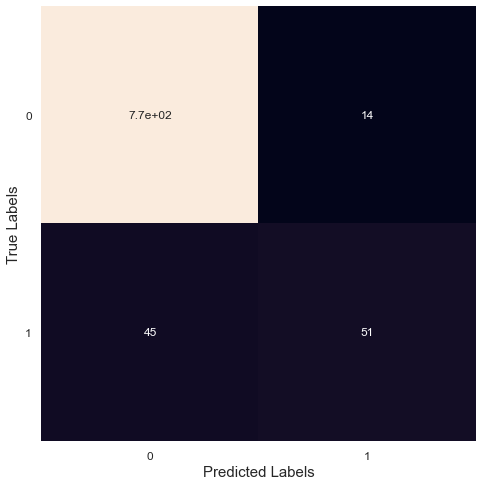

In [29]:
Ada_performance = evaluate_model(models['AdaBoost'], X_train, y_train, X_test, y_test)

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       780
           1       0.76      0.61      0.68        96

    accuracy                           0.94       876
   macro avg       0.86      0.80      0.82       876
weighted avg       0.93      0.94      0.93       876



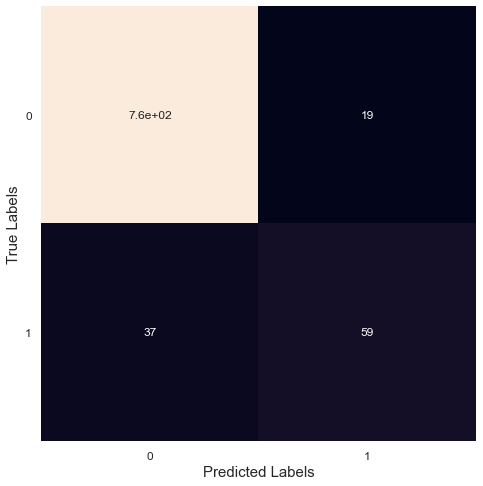

In [30]:
DTC_performance = evaluate_model(models['Decision Tree'], X_train, y_train, X_test, y_test)

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       780
           1       0.68      0.14      0.23        96

    accuracy                           0.90       876
   macro avg       0.79      0.56      0.59       876
weighted avg       0.88      0.90      0.87       876



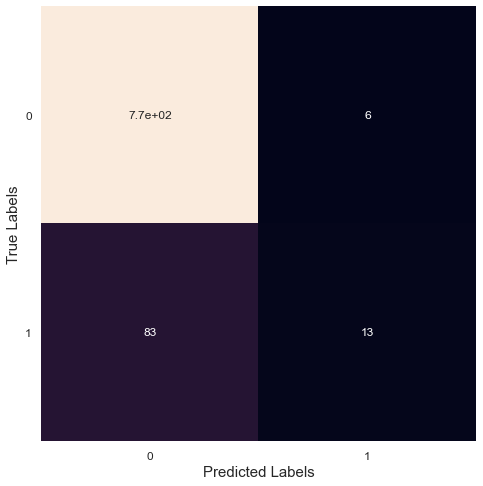

In [31]:
log_reg_performance = evaluate_model(models['Logistic Regression'], X_train, y_train, X_test, y_test)

<h3>For scaled data...

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       780
           1       0.79      0.54      0.64        96

    accuracy                           0.93       876
   macro avg       0.87      0.76      0.80       876
weighted avg       0.93      0.93      0.93       876



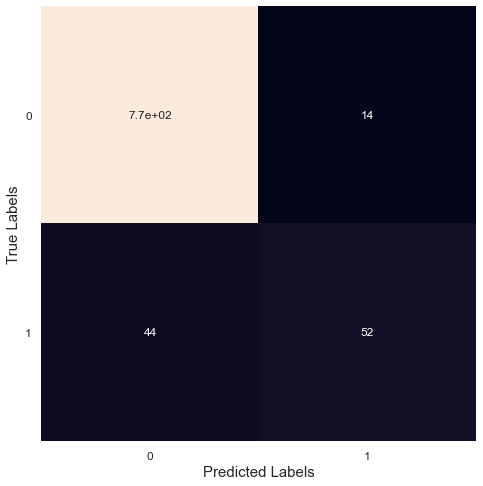

In [32]:
Ada_performance_sc = evaluate_model(models['AdaBoost'], X_train_sc, y_train, X_test_sc, y_test)

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       780
           1       0.76      0.61      0.68        96

    accuracy                           0.94       876
   macro avg       0.86      0.80      0.82       876
weighted avg       0.93      0.94      0.93       876



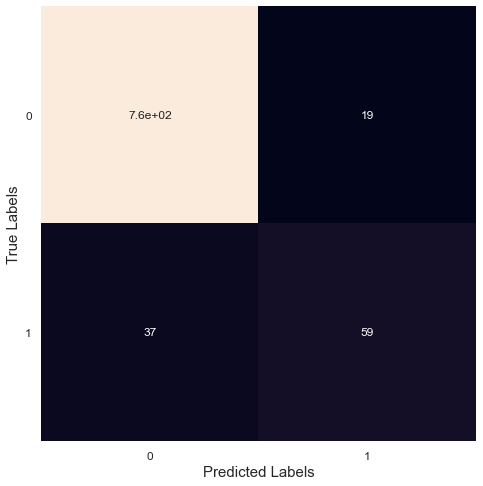

In [33]:
DTC_performance_sc = evaluate_model(models['Decision Tree'], X_train_sc, y_train, X_test_sc, y_test)

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       780
           1       0.65      0.11      0.19        96

    accuracy                           0.90       876
   macro avg       0.77      0.55      0.57       876
weighted avg       0.87      0.90      0.86       876



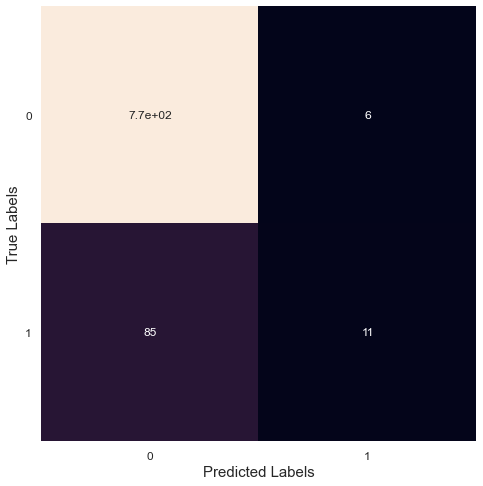

In [34]:
log_reg_performance_sc = evaluate_model(models['Logistic Regression'], X_train_sc, y_train, X_test_sc, y_test)

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

<h3>Carrying out evaluation for unscaled data...<h3>

In [35]:
performance = pd.DataFrame({'AdaBoost' : Ada_performance,
                            'AdaBoost (scaled)' : Ada_performance_sc,
                            'Decision Tree' : DTC_performance,
                            'Decision Tree (scaled)' : DTC_performance_sc,
                            'Log Regression' : log_reg_performance,
                            'Log Regression (scaled)' : log_reg_performance_sc})

In [36]:
performance

,AdaBoost,AdaBoost (scaled),Decision Tree,Decision Tree (scaled),Log Regression,Log Regression (scaled)
accuracy,0.932648,0.933790,0.936073,0.936073,0.898402,0.896119
f1,0.798228,0.802749,0.821336,0.821336,0.585860,0.569584
recall,0.756651,0.761859,0.795112,0.795112,0.563862,0.553446
precision,0.864564,0.866779,0.855022,0.855022,0.793681,0.774053
roc_auc,0.756651,0.761859,0.795112,0.795112,0.563862,0.553446


It is observed above that scaling has varying effects on model performance. As expected, the Decision Tree model is unaffected by scaling.

The AdaBoost classifier saw a boost across all evaluation metrics due to scaling. As such, scaling seems to be beneficial in its case.

Lastly, in the case of the Logistic Regression classifier, application of feature scaling led to a drop in performance across all metrics.

Of four out of five metrics, the Decision Tree model turns out to be best. It even has the AdaBoost model almost beat on the third. It is only truly beaten on the precision score. As such, the Decision Tree model will be selected.

<h3>Carrying out evaluation for scaled data...

<h4> Ways of improving the Decision Tree model:
    
    (1). Specify appropriate values for the 'class_weight' hyperparameter.
    
    (2). Manipulating the max_depth hyperparameter.
    
    (3). Run a grid search or a random search. Bayesian search may also be suitable.

In [37]:
new_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 123, criterion = 'entropy')

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       780
           1       0.76      0.64      0.69        96

    accuracy                           0.94       876
   macro avg       0.86      0.81      0.83       876
weighted avg       0.93      0.94      0.94       876



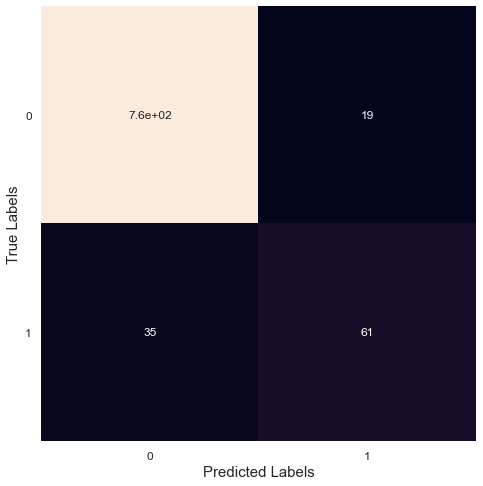

In [38]:
new_dtc_performance = evaluate_model(new_dtc, X_train, y_train, X_test, y_test)

                                        
**********************************
**********************************
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       780
           1       0.76      0.64      0.69        96

    accuracy                           0.94       876
   macro avg       0.86      0.81      0.83       876
weighted avg       0.93      0.94      0.94       876



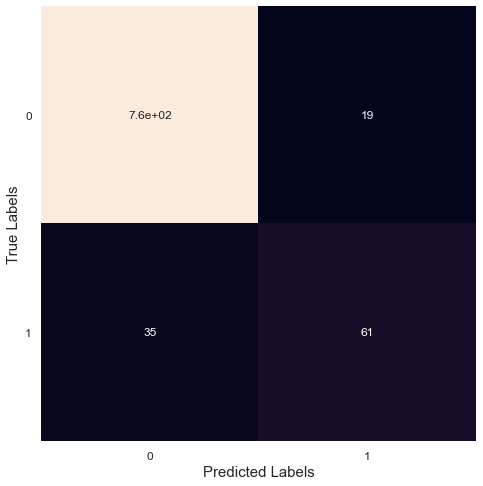

In [39]:
new_dtc_performance_sc = evaluate_model(new_dtc, X_train_sc, y_train, X_test_sc, y_test)

In [40]:
new_performance = pd.DataFrame({'AdaBoost' : Ada_performance,
                            'AdaBoost (scaled)' : Ada_performance_sc,
                            'Decision Tree' : DTC_performance,
                            'Decision Tree (scaled)' : DTC_performance_sc,
                            'New Decision Tree' : new_dtc_performance,
                            'New Decision Tree (scaled)' : new_dtc_performance_sc,
                            'Log Regression' : log_reg_performance,
                            'Log Regression (scaled)' : log_reg_performance_sc})

In [41]:
new_performance

,AdaBoost,AdaBoost (scaled),Decision Tree,Decision Tree (scaled),New Decision Tree,New Decision Tree (scaled),Log Regression,Log Regression (scaled)
accuracy,0.932648,0.933790,0.936073,0.936073,0.938356,0.938356,0.898402,0.896119
f1,0.798228,0.802749,0.821336,0.821336,0.829459,0.829459,0.585860,0.569584
recall,0.756651,0.761859,0.795112,0.795112,0.805529,0.805529,0.563862,0.553446
precision,0.864564,0.866779,0.855022,0.855022,0.859265,0.859265,0.793681,0.774053
roc_auc,0.756651,0.761859,0.795112,0.795112,0.805529,0.805529,0.563862,0.553446


<h4>Rounding up to three decimal places (3 d.f.) for ease of inspection...<h4>

In [42]:
new_performance.apply(lambda x : x.round(3))

,AdaBoost,AdaBoost (scaled),Decision Tree,Decision Tree (scaled),New Decision Tree,New Decision Tree (scaled),Log Regression,Log Regression (scaled)
accuracy,0.933,0.934,0.936,0.936,0.938,0.938,0.898,0.896
f1,0.798,0.803,0.821,0.821,0.829,0.829,0.586,0.570
recall,0.757,0.762,0.795,0.795,0.806,0.806,0.564,0.553
precision,0.865,0.867,0.855,0.855,0.859,0.859,0.794,0.774
roc_auc,0.757,0.762,0.795,0.795,0.806,0.806,0.564,0.553


In [48]:
new_performance.iloc[:, 0:6].apply(lambda x : x.round(3))

,AdaBoost,AdaBoost (scaled),Decision Tree,Decision Tree (scaled),New Decision Tree,New Decision Tree (scaled)
accuracy,0.933,0.934,0.936,0.936,0.938,0.938
f1,0.798,0.803,0.821,0.821,0.829,0.829
recall,0.757,0.762,0.795,0.795,0.806,0.806
precision,0.865,0.867,0.855,0.855,0.859,0.859
roc_auc,0.757,0.762,0.795,0.795,0.806,0.806


<h4> As can be seen above, a few tweaks may actually be beneficial to model performance.

In [44]:
new_dtc = DecisionTreeClassifier(random_state = 123)

In [45]:
# For unscaled data...
param_grid = {'max_depth' : [3, 4, 5, 6, 7],
              'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', None]}

for i in ['recall_macro', 'f1_macro', 'accuracy', 'precision_macro', 'roc_auc']:
    grid = GridSearchCV(estimator = new_dtc, scoring = i, n_jobs = -1, param_grid = param_grid)
    grid.fit(X_train, y_train)
    print('                             ')
    print('********************************')
    print('********************************')
    print('Best {} score: {}'.format(i, grid.best_score_))
    print('Best {} parameters: {}'.format(i, grid.best_params_))
    print('                                ')
    print('********************************')
    print('********************************')
    print('                             ')
    

                             
********************************
********************************
Best recall_macro score: 0.8184555848192211
Best recall_macro parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
                                
********************************
********************************
                             
                             
********************************
********************************
Best f1_macro score: 0.842876445064884
Best f1_macro parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
                                
********************************
********************************
                             
                             
********************************
********************************
Best accuracy score: 0.9446869456829186
Best accuracy parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
                                
*****************************

In [46]:
# For scaled data...
param_grid_sc = {'max_depth' : [3, 4, 5, 6, 7],
                 'criterion' : ['gini', 'entropy'],
                 'max_features' : ['auto', 'sqrt', None]}

for i in ['recall_macro', 'f1_macro', 'accuracy', 'precision_macro', 'roc_auc']:
    grid = GridSearchCV(estimator = new_dtc, scoring = i, n_jobs = -1, param_grid = param_grid)
    grid.fit(X_train, y_train)
    print('                             ')
    print('********************************')
    print('********************************')
    print('Best {} score: {}'.format(i, grid.best_score_))
    print('Best {} parameters: {}'.format(i, grid.best_params_))
    print('                                ')
    print('********************************')
    print('********************************')
    print('                             ')
    

                             
********************************
********************************
Best recall_macro score: 0.8184555848192211
Best recall_macro parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
                                
********************************
********************************
                             
                             
********************************
********************************
Best f1_macro score: 0.842876445064884
Best f1_macro parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
                                
********************************
********************************
                             
                             
********************************
********************************
Best accuracy score: 0.9446869456829186
Best accuracy parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}
                                
*****************************

<h4> Based on the preferred evaluation metric, the optimized hyperparametric settings can be selected.